<h1><center>Optimization in Generalized Linear Models </center></h1>


This practical work aims to implement two popular machine learning methods:

-   **Exercice 1:** The goal of this exercice is to implement and understand the gradient descent method for the linear regression model.

-   **Exercice 2:** The goal of this exercice is to understand the logistic regression model, implement the corresponding gradient descent solution and compare it to the glm (library) solution.


In [1]:
import pandas as pd
import numpy as np

data_regression = pd.read_csv("data/regression.csv", sep=";")  # load the data
data_classif = pd.read_csv("data/classification.csv", sep=";")

# Exercice 1. Linear regression


Denote by D=$(x_i,y_i)_{1 \leq i \leq n}$ the set of $n$ samples (training sample). Let Y be the vector with coordinates $y_i$ and $X$ the matrix of size $n \times d$ with rows $x_i$.


1. Create two objects $(X,Y)$, knowing that the first column of the i-th row corresponds to $y_i$. The other columns correspond to $x_i$.


In [2]:
X, y = data_regression.iloc[:, 1:], data_regression.iloc[:, 0]

2. Show that the least squares solution is given by:

$$\widehat{\beta}=(X^{\top}X)^{-1}X^\top Y$$


-   Add a column of 1 to take into account the: ''intercept'' $\beta_0$


In [3]:
X["intercept"] = 1

In [4]:
X.head(5)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,intercept
0,1.028992,0.622963,0.278925,-0.405870,0.958563,-1.133672,-0.563239,1.096962,0.420335,0.911695,1
1,0.604380,1.639447,1.121144,-0.012976,-0.000129,1.603966,-0.074142,-1.036641,-0.451208,-0.225835,1
2,-0.634519,0.093021,0.328398,-1.333980,-0.419870,-0.094647,-2.369584,0.859509,-0.310185,-0.101982,1
3,0.383733,-1.258306,0.955069,-0.094585,-0.337204,2.054539,-1.423585,1.220261,0.186976,-0.763621,1
4,0.770505,-0.464247,0.066713,1.035105,1.780473,0.563849,0.519628,0.594002,-0.948932,0.258373,1


-   Compute $\widehat{\beta}$


In [5]:
beta_opt = np.linalg.inv(X.T @ X) @ (X.T @ y)  # @ is equivalent to 'np.dot'

In [6]:
print(beta_opt)

[ 0.95803718  2.04479784  3.06512498  3.81918261  5.10627556  6.05860667
  6.84191879  8.00113116  8.97700084 10.15585877  0.96002885]


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X.drop(columns=["intercept"]), y)
print(np.append(model.coef_, model.intercept_))

[ 0.95803718  2.04479784  3.06512498  3.81918261  5.10627556  6.05860667
  6.84191879  8.00113116  8.97700084 10.15585877  0.96002885]


4.Write the gradient of the function $f$ : $\beta \in \mathbb{R} \mapsto \vert \vert Y − X\beta \vert \vert ^2$


In [8]:
def f_obj(beta):
    residuals = y - X @ beta
    obj = np.sum(residuals**2)  # alternative: np.linalg.norm(residuals ** 2)
    return obj


def gradient_f(beta):
    grad = -X.T @ (y - X @ beta)
    return grad

5.Implement the gradient descent method and plot the curve corresponding to $t \mapsto ∥\beta_t − \widehat{\beta}∥^2$, where $\beta_t$ represents the iteration number $t$ for gradient descent given $\beta_0$ and a stepsize.


-   Definition of the gradient descent function:


In [9]:
def gradient_descent(n_iter, beta0, step):
    beta_old = beta0
    objectives = []
    errors = []
    print("i ", " | ", "obj      ", " | ", "err")
    print("\n")
    for i in range(1, n_iter):
        # insert the gradient descent formula
        beta_new = beta_old - step * gradient_f(beta_old)
        obj = f_obj(beta_new)
        # err = TODO
        err = np.linalg.norm(beta_new - beta_opt) ** 2
        beta_old = beta_new
        errors.append(err)
        objectives.append(obj)
        if i % 10 == 0:
            print(i, "  |  ", objectives[-1], "  |  ", errors[-1])
            print("\n")
        beta_old = beta_new
    return (beta_new, errors, objectives)

_N.B : We can think of a different stopping rule to replace the loop on n_iterations._


-   Compute the optimal least squares solution:


In [10]:
n_iter = 100
result = gradient_descent(n_iter, beta0=np.zeros(X.shape[1]), step=0.001)

i   |  obj        |  err


10   |   4612.895958822942   |   61.0361917426361


20   |   1016.4627570906611   |   15.042495558748527


30   |   329.92509643872137   |   4.342576218696461


40   |   151.54340105476155   |   1.333814911196925


50   |   99.74190559507421   |   0.4250737745833776


60   |   83.91084200092013   |   0.13940515588768423


70   |   78.90116928074734   |   0.04682090074665288


80   |   77.26948957943362   |   0.016037084450139957


90   |   76.72477576514713   |   0.005580261722967269




-   Draw the curve of errors:


Text(0, 0.5, 'error with respect to the optimum')

<Figure size 500x500 with 0 Axes>

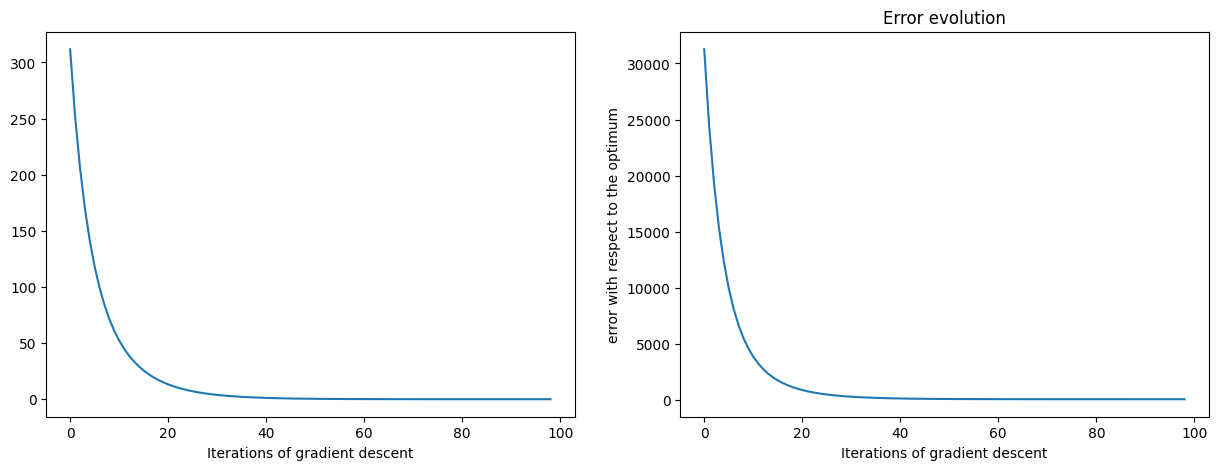

In [11]:
import matplotlib.pylab as plt

fig1 = plt.figure(figsize=(5, 5))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(result[1])
ax[1].plot(result[2])
plt.title("Error evolution")
ax[0].set_xlabel("Iterations of gradient descent")
ax[1].set_xlabel("Iterations of gradient descent")
plt.ylabel("error with respect to the optimum")

# Exercice 2 : Logistic regression


1.Define $X$ and $y$ based on the dataframe data_classif:


In [59]:
data_classif.head(3)

,Y,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0,-0.975348,1.026274,-1.789708,0.632264,0.696836,-1.460567,-0.056910,2.016188,-0.236022,0.966914
1,0,0.863402,1.293269,-0.487214,0.614807,-1.051546,-1.273851,-1.467305,1.388982,1.457754,-0.716669
2,0,-0.712547,1.203891,0.353590,-0.385416,-0.413320,0.167995,-0.402048,-0.234347,0.293442,0.471140


In [80]:
X, y = data_classif.iloc[:, 1:], data_classif["Y"]

In [81]:
X.shape

(1000, 10)

2. We recall that the logistic regression minimization problem is given by:

$$ \min*{\beta} f(\beta) = \sum*{i=1}^{n}\left[y_i\log\left(1+ \exp^{-\langle x_i, \beta \rangle}\right) + (1-y_i)\log\left(1+\exp^{ \langle x_i, \beta \rangle }\right)\right]$$
where
$$ p_i = \frac{1}{1+ \exp^{-\langle x_i, \beta \rangle}} = \mathbb{P}(y_i = 1 | \langle x_i,\beta\rangle) $$


2.1. Define the objective function at point $\beta$ with respect to X,y:


In [85]:
def compute_obj_logistic(X, y, beta):
    obj = 0
    for i in range(len(X)):
        # define the value of the sum at row i :
        prod = X[i] @ beta
        h = y[i] * np.log(1 + np.exp(-prod)) + (1 - y[i]) * np.log(1 + np.exp(prod))
        obj += h

    return obj

In [90]:
def compute_obj_fast_logistic(X, y, beta):
    prod = X @ beta
    obj = y * np.log(1 + np.exp(-prod)) + (1 - y) * np.log(1 + np.exp(prod))
    return np.sum(obj)

2.2. Define the gradient of the objective function as a function of $\beta$


In [92]:
def compute_grad_logistic(X, y, beta):
    prod = X @ beta
    prob = 1 / (1 + np.exp(-prod))  # Sigmoid function
    grad = X.T @ (y - prob)  # Vectorized computation of the gradient
    return grad

In [93]:
compute_obj_fast_logistic(np.array(X), np.array(y), np.ones(X.shape[1]))

338.08325571981925

2.3. Define the gradient descent function :


In [94]:
def gradient_descent_log(n_iter, X, y, beta0, step):
    beta_old = beta0
    objectives = []
    print("i ", " | ", "obj")
    print("\n")
    for i in range(1, n_iter):
        # TODO : add the gradient descent iteration
        beta_new = beta_old - step * compute_grad_logistic(X, y, beta_old)
        obj = compute_obj_fast_logistic(X, y, beta_new)
        objectives.append(obj)
        if i % 10 == 0:
            print(i, "  |  ", obj)
        beta_old = beta_new
    return beta_new, objectives

In [98]:
beta_logistic_opt, _ = gradient_descent_log(
    400,
    np.array(X),
    np.array(y),
    np.ones(X.shape[1]),
    step=0.0001,
)

i   |  obj


10   |   354.13198206773393
20   |   355.38770888231954
30   |   356.7687224007859
40   |   358.2908729016573
50   |   359.9721954303951
60   |   361.8332274162681
70   |   363.8973707241946
80   |   366.1913014920956
90   |   368.74543016701136
100   |   371.59441319971074
110   |   374.777717494662
120   |   378.3402399437613
130   |   382.3329884776318
140   |   386.8138391372207
150   |   391.848395720338
160   |   397.5109924737835
170   |   403.88589124398743
180   |   411.06872577766177
190   |   419.1682318608825
200   |   428.3082725859096
210   |   438.63013243428907
220   |   450.29503027955195
230   |   463.4868094884781
240   |   478.4148114127938
250   |   495.317020276029
260   |   514.4636806694716
270   |   536.1617400052237
280   |   560.7605576392843
290   |   588.6588956197412
300   |   620.311371365285
310   |   656.2287945980413
320   |   696.9637346935234
330   |   743.0782155505966
340   |   795.1071098341138
350   |   853.5376262482221
360   |   91

In [78]:
beta_logistic_opt

array([-3.07014561, -6.55976195, -1.5840037 , -4.32652616,  2.90812401,
       -2.52847978, -8.1281816 , -2.00008307, -6.53013504, -5.67310549])

3.Comparison with scikit-learn:


-   Define the two vectors beta_glm and beta_log then compute the mean squared error “mse” between the two vectors


In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=400)
model.fit(X, y)

beta = model.coef_
beta

array([[1.03420187, 1.02429452, 1.02672634, 1.09042993, 0.84717787,
        0.94125618, 1.13636674, 0.89765396, 1.097285  , 1.07618093]])

In [54]:
# Compute the MSE between the two vectors
np.linalg.norm([beta.ravel(), beta_logistic_opt])

9.098370450019702